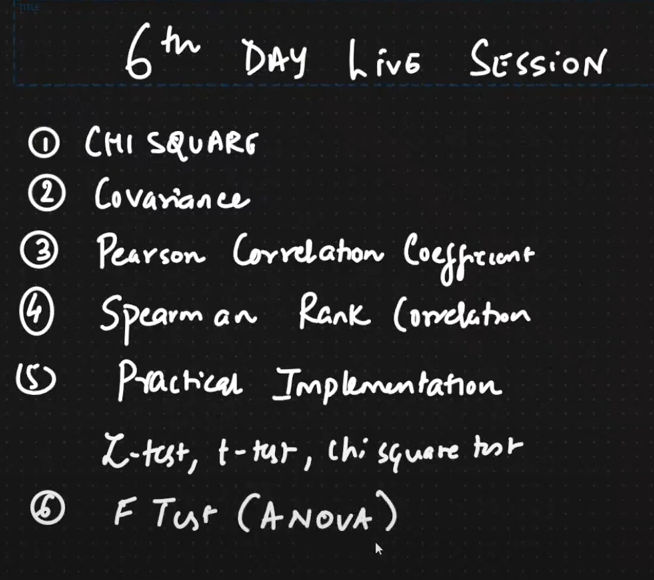


# chi square test

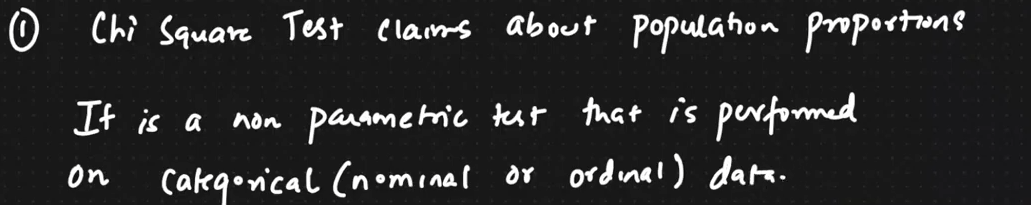


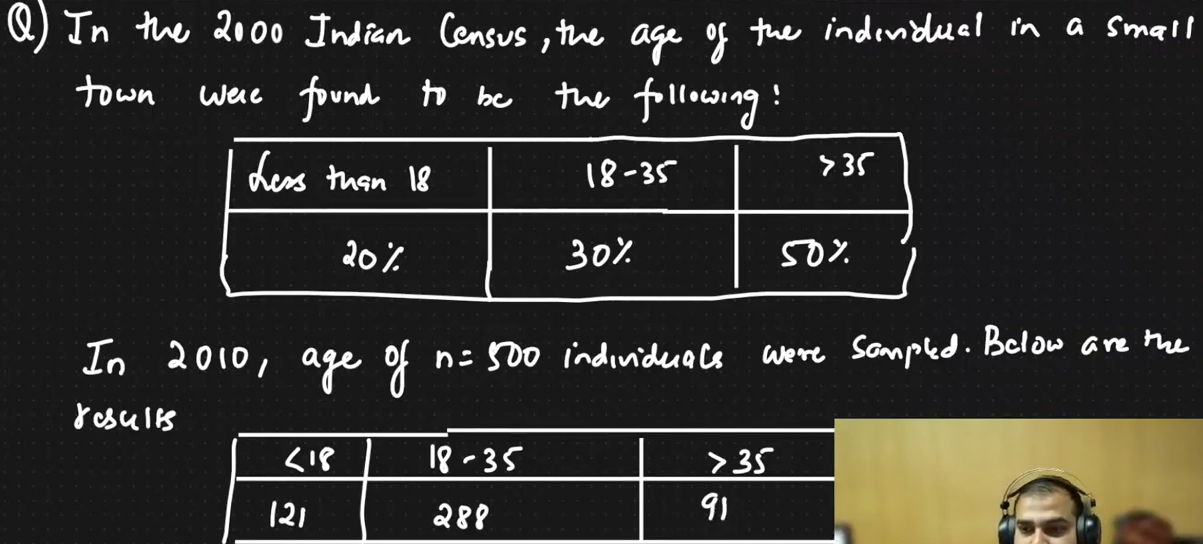

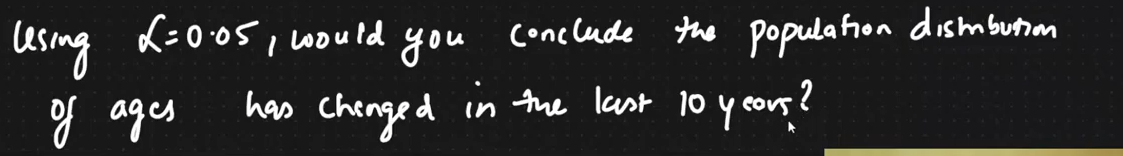

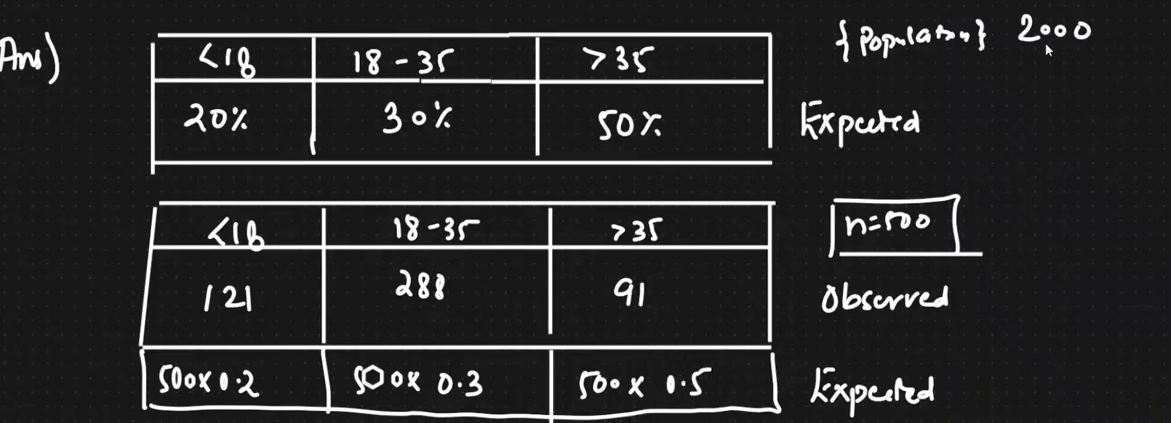

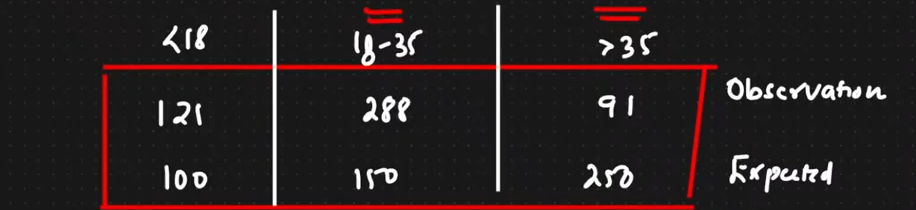

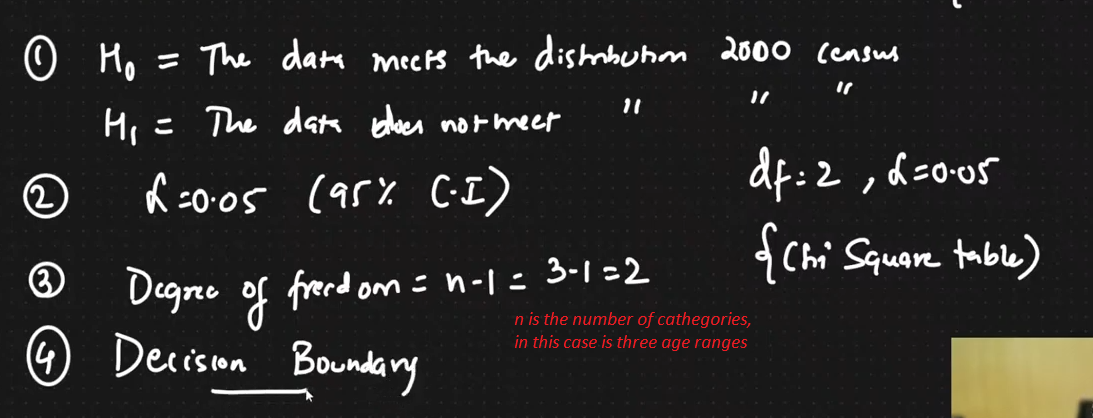

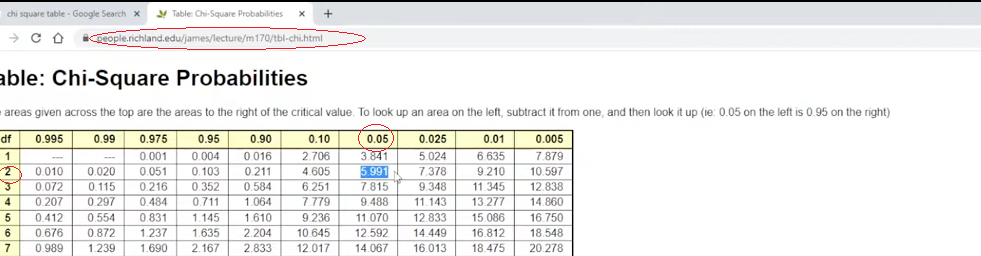

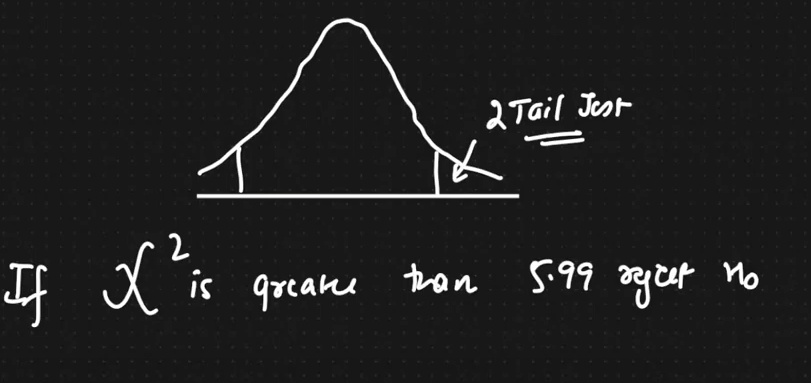

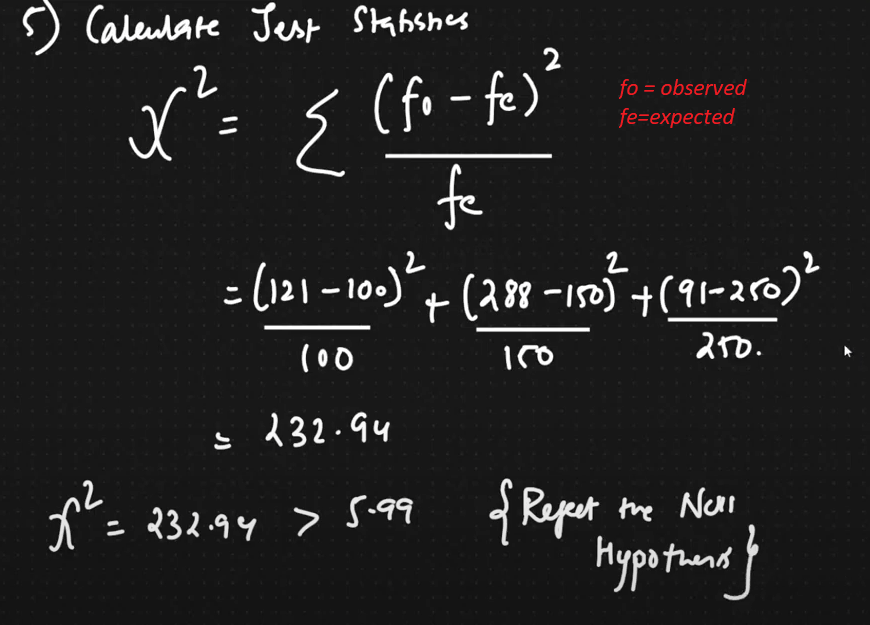

### Example
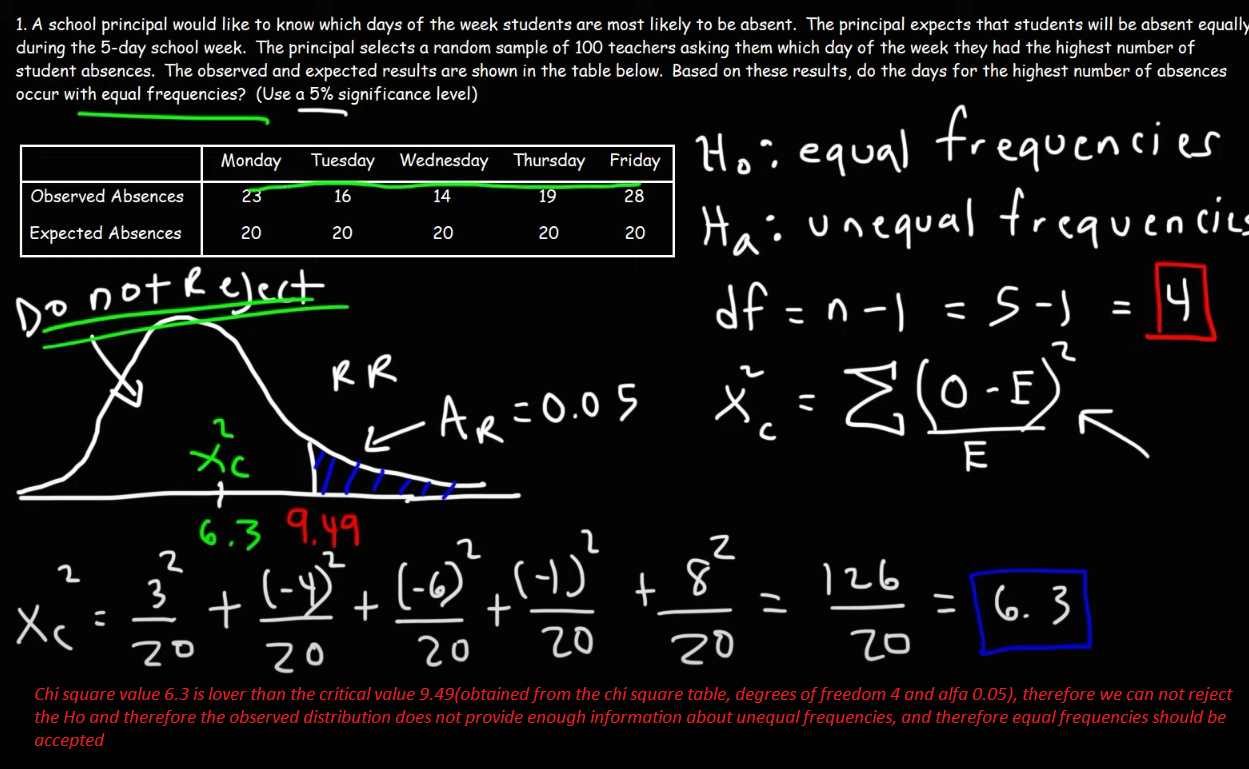

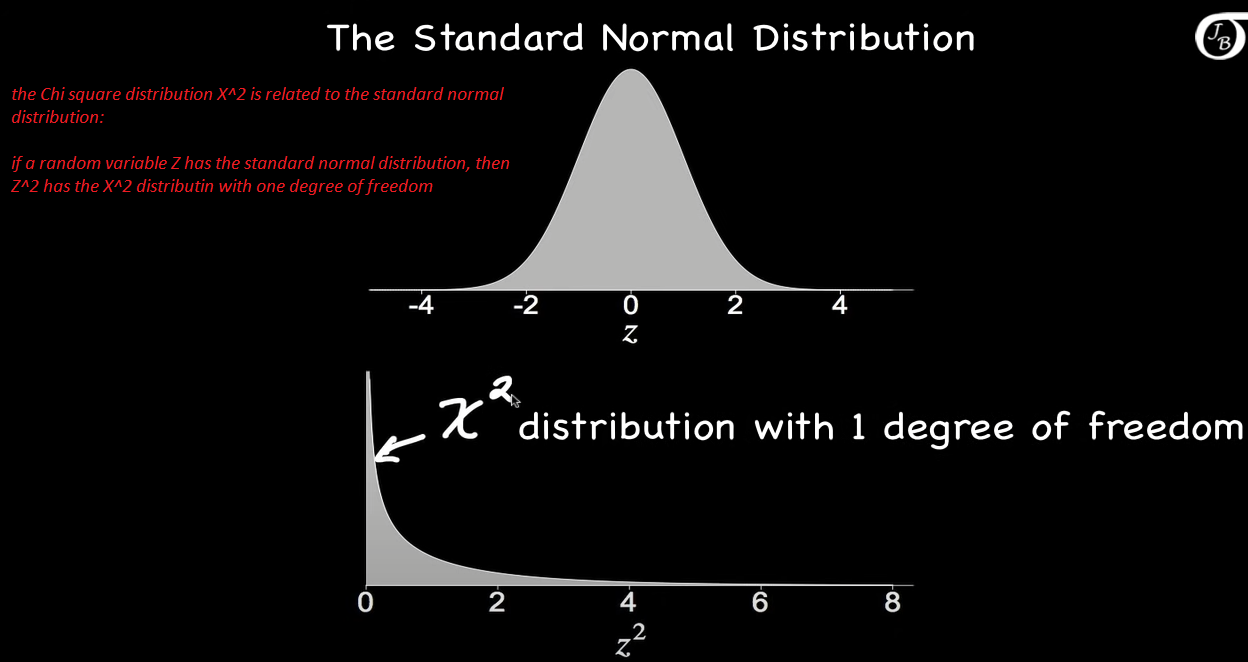

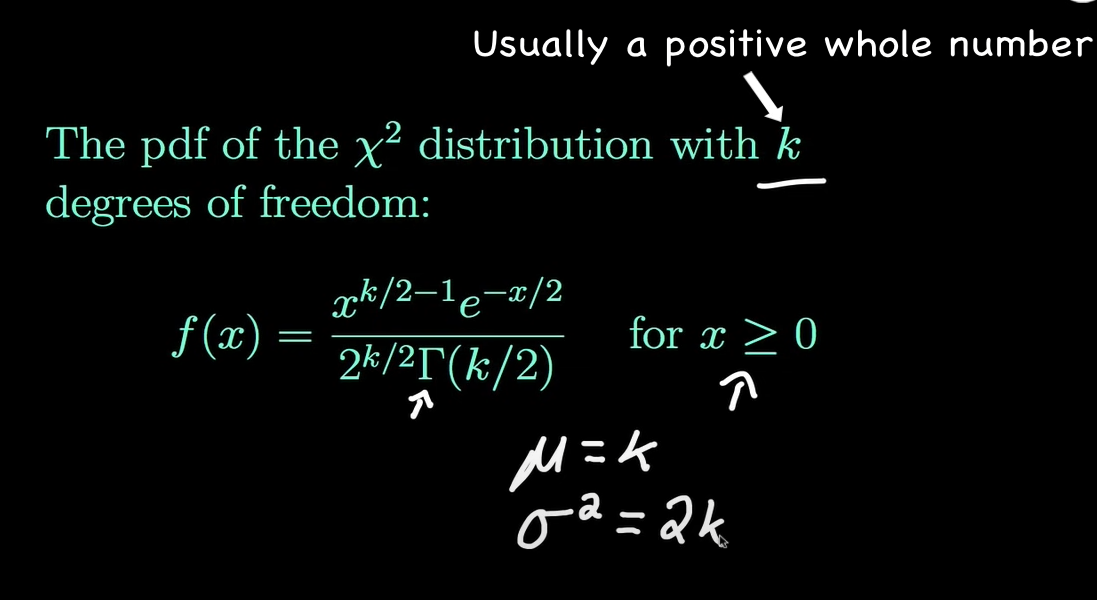

X^2 distribution for degrees of freedom 1&2
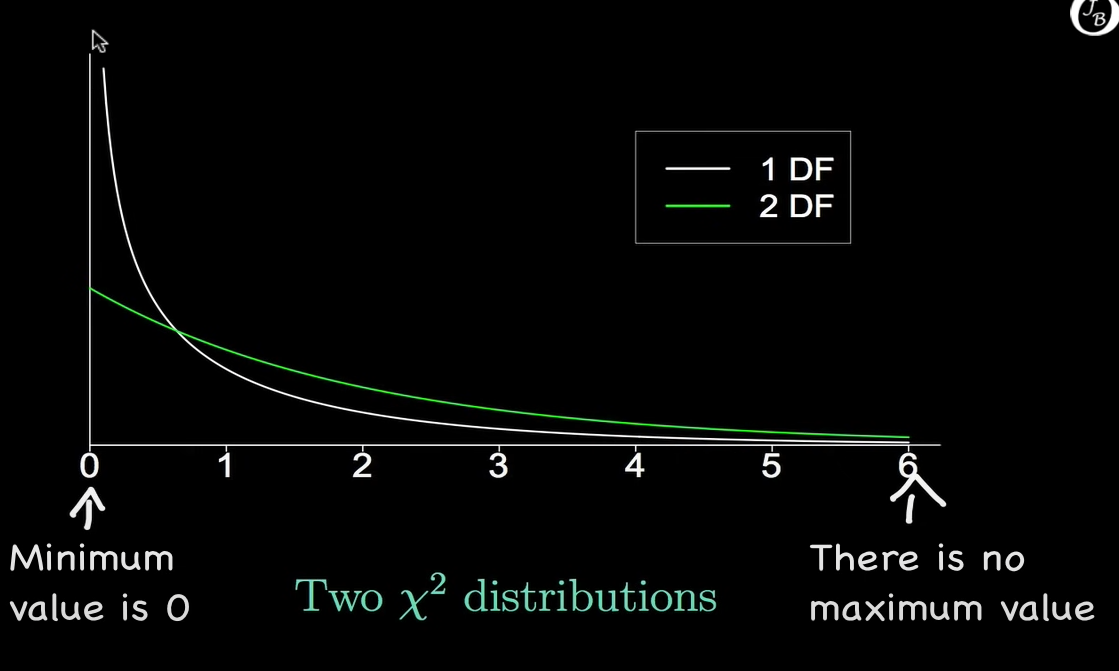

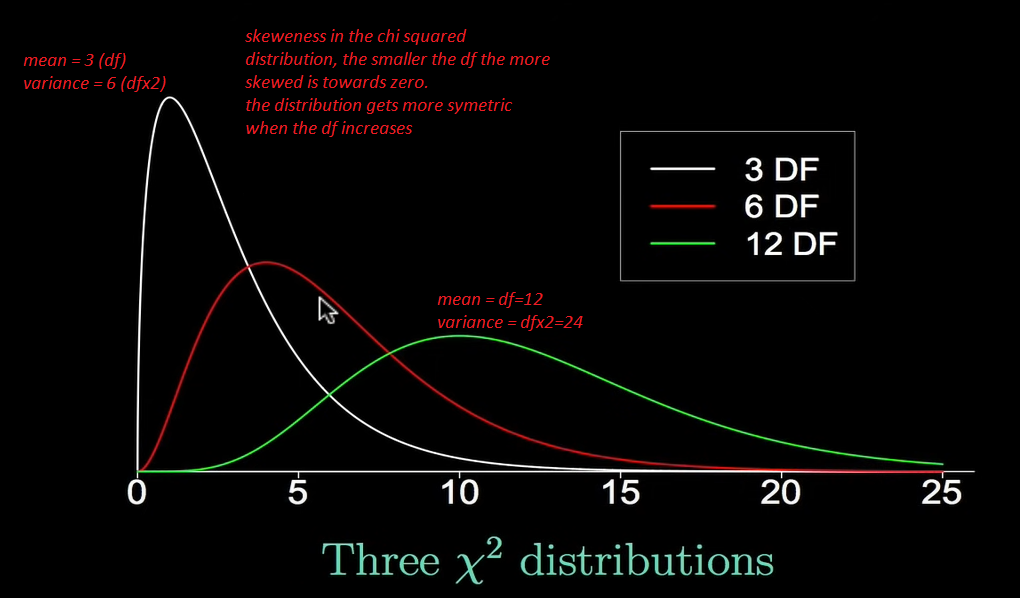

# Exercise

In [8]:
#!pip install ruamel_yaml
#!pip install --upgrade pandas-datareader --user

In [9]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

In [10]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [12]:
import pandas_datareader as pdr
# Request data via Yahoo public API
SP = pdr.get_data_yahoo('^GSPC',start='2009-12-31', end='2019-12-31')
# Display Info
print(SP.info())
SP.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2009-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   int64  
 5   Adj Close  2517 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.6 KB
None


High          Low         Open        Close      Volume  \
Date                                                                         
2009-12-31  1127.640015  1114.810059  1126.599976  1115.099976  2076990000   
2010-01-04  1133.869995  1116.560059  1116.560059  1132.989990  3991400000   
2010-01-05  1136.630005  1129.660034  1132.660034  1136.520020  2491020000   
2010-01-06  1139.189941  1133.949951  1135.709961  1137.140015  4972660000   
2010-01-07  1142.459961  1131.319946  1136.270020  1141.689941  5270680000   

              Adj Close  
Date                     
2009-12-31  1115.099976  
2010-01-04  1132.989990  
2010-01-05  1136.520020  
2010-01-06  1137.140015  
2010-01-07  1141.689941

In [13]:
SP.tail()

High          Low         Open        Close      Volume  \
Date                                                                         
2019-12-24  3226.429932  3220.510010  3225.449951  3223.379883  1296540000   
2019-12-26  3240.080078  3227.199951  3227.199951  3239.909912  2160680000   
2019-12-27  3247.929932  3234.370117  3247.229980  3240.020020  2428670000   
2019-12-30  3240.919922  3216.570068  3240.090088  3221.290039  3013290000   
2019-12-31  3231.719971  3212.030029  3215.179932  3230.780029  2893810000   

              Adj Close  
Date                     
2019-12-24  3223.379883  
2019-12-26  3239.909912  
2019-12-27  3240.020020  
2019-12-30  3221.290039  
2019-12-31  3230.780029

In [14]:
SP["LogReturn"]=np.log(SP["Adj Close"])-np.log(SP["Adj Close"].shift(1))  # LOG of the return
SP
                                               

High          Low         Open        Close      Volume  \
Date                                                                         
2009-12-31  1127.640015  1114.810059  1126.599976  1115.099976  2076990000   
2010-01-04  1133.869995  1116.560059  1116.560059  1132.989990  3991400000   
2010-01-05  1136.630005  1129.660034  1132.660034  1136.520020  2491020000   
2010-01-06  1139.189941  1133.949951  1135.709961  1137.140015  4972660000   
2010-01-07  1142.459961  1131.319946  1136.270020  1141.689941  5270680000   
...                 ...          ...          ...          ...         ...   
2019-12-24  3226.429932  3220.510010  3225.449951  3223.379883  1296540000   
2019-12-26  3240.080078  3227.199951  3227.199951  3239.909912  2160680000   
2019-12-27  3247.929932  3234.370117  3247.229980  3240.020020  2428670000   
2019-12-30  3240.919922  3216.570068  3240.090088  3221.290039  3013290000   
2019-12-31  3231.719971  3212.030029  3215.179932  3230.780029  2893810000   

              Adj Close  LogReturn  
Date                                
2009-12-31  1115.099976        NaN  
2010-01-04  1132.989990   0.015916  
2010-01-05  1136.520020   0.003111  
2010-01-06  1137.140015   0.000545  
2010-01-07  1141.689941   0.003993  
...                 ...        ...  
2019-12-24  3223.379883  -0.000195  
2019-12-26  3239.909912   0.005115  
2019-12-27  3240.020020   0.000034  
2019-12-30  3221.290039  -0.005798  
2019-12-31  3230.780029   0.002942  

[2517 rows x 7 columns]

In [15]:
SP["LogReturn"].describe()

count    2516.000000
mean        0.000423
std         0.009321
min        -0.068958
25%        -0.003269
50%         0.000596
75%         0.005036
max         0.048403
Name: LogReturn, dtype: float64

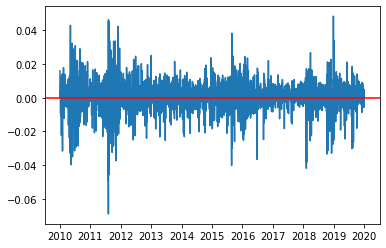

In [16]:
plt.plot(SP["LogReturn"])
plt.axhline(0,color="red")    # returns appear evenly distributed about zero

<AxesSubplot:>

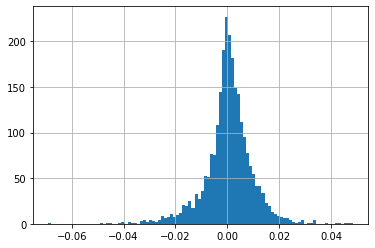

In [18]:
SP["LogReturn"].hist(bins=100)  # again returns appear equally distributed

### compute the probability that the returns are different from zero by calculating Z-TEST

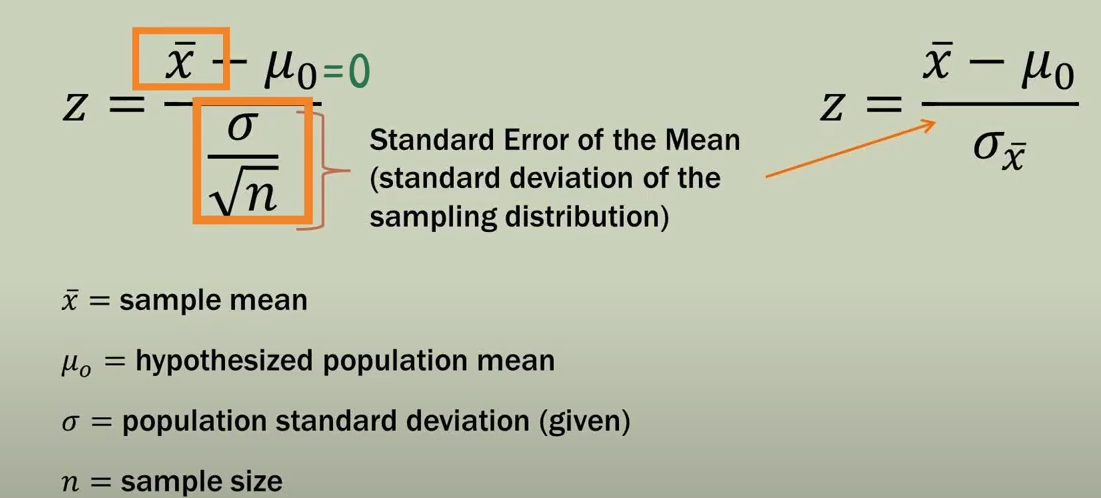
* We need the mean, std and n, here the mean of population is ZERO

In [23]:
n=len(SP["LogReturn"])  # sample size
n

2517

In [25]:
xbar=SP["LogReturn"].mean()   # sample mean value
xbar

0.0004228058577593553

In [28]:
s = SP["LogReturn"].std(ddof=1)/n**0.5  # standard error
s

0.0001857825604725471

In [29]:
zhat = (xbar - 0.0) / s   # the sample mean is 2.27 std above zero
print(zhat)

2.275810262728255


In [30]:
pvalue = 1-2*(1-norm.cdf(np.abs(zhat))) 
pvalue     # there is a 97% probability that the average daily returns from sp500 is diff from 0

0.9771426317659009

In [31]:
alpha=0.05   # 95% confidence interval with z distribution
z_left=norm.ppf(alpha/2)
z_right=norm.ppf(1-alpha/2)

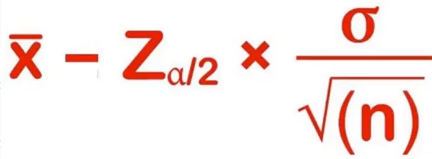

In [32]:
interval_left=xbar+z_left*s
interval_right=xbar+z_right*s
print("95% confidence interval is ", (interval_left, interval_right))

95% confidence interval is  (5.867873027752828e-05, 0.0007869329852411822)


In [34]:
from scipy.stats import t  # t-distribution

In [35]:
t_left=t.interval(0.95,n-1)[0]   # requires the confidence interval and the dof
t_right=t.interval(0.95,n-1)[1]
interval_left=xbar+t_left*s
interval_right=xbar+t_right*s
print("95% confidence interval is ", (interval_left, interval_right))

95% confidence interval is  (5.850347784792443e-05, 0.0007871082376707862)


# Example


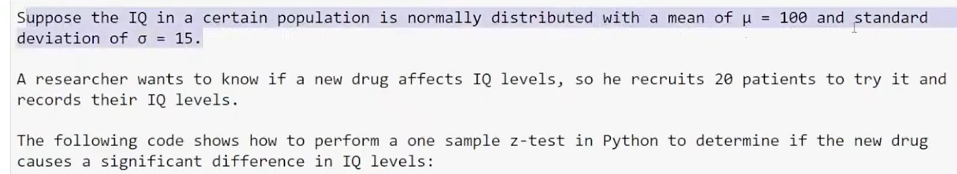

In [4]:
from statsmodels.stats.weightstats import ztest as ztest

# IQ LEVELS for 20 patients
data=[88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]


ztest(data,value=100)  # gives zvalue and pvalue
# Since this p-value is not less than .05, we do not have sufficient evidence to reject 
# the null hypothesis. In other words, the new drug does not significantly affect IQ level.

# if pvalue < significance value we reject the Ho


(1.5976240527147705, 0.1101266701438426)

# Covariance

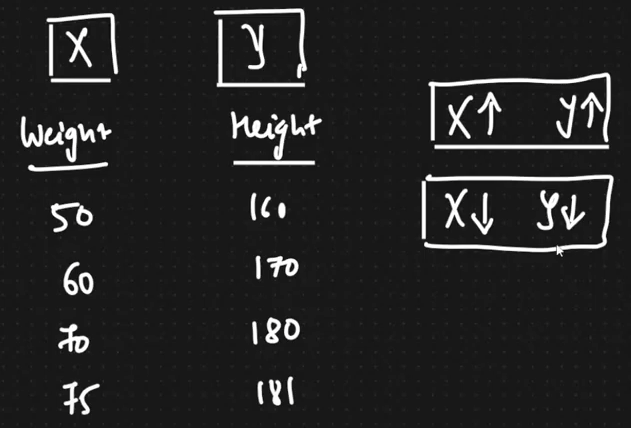

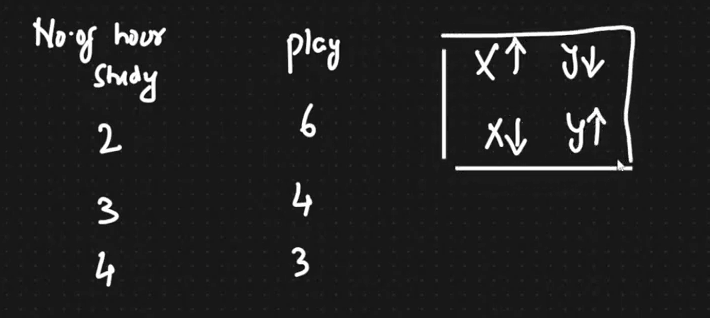

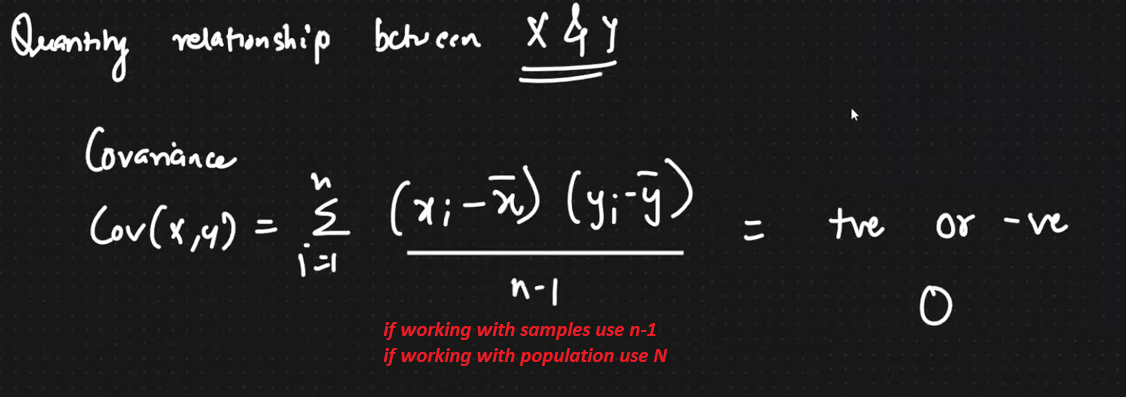

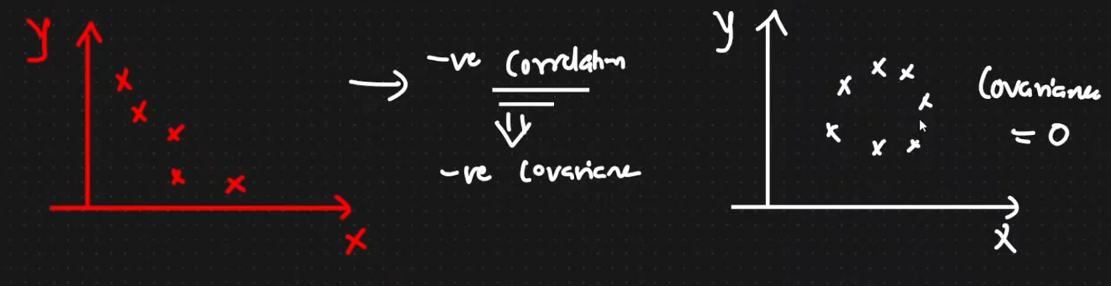
* the disadventage of covariance is that it does not have a limit number although it provides the direction of the correlation 

### Person correlation coefficient - Restricts all the values between [-1,1]
* this correlation is really good when dealing with linear correlations

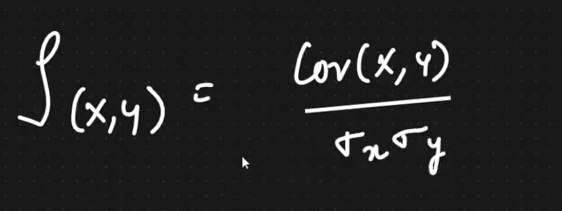

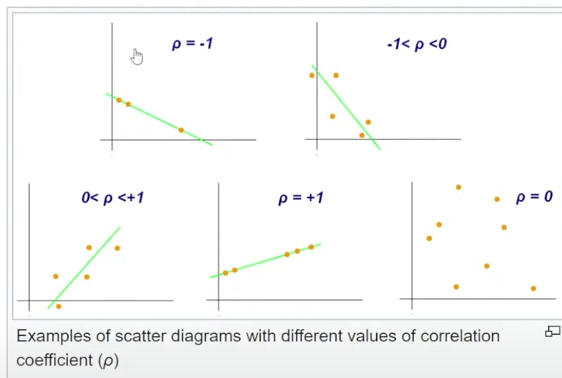

### Spearmans rank correlation coefficient
* this correlation is better when dealing with NO linear correlations
* it provides a better result when the two variables being compared are monotonically related
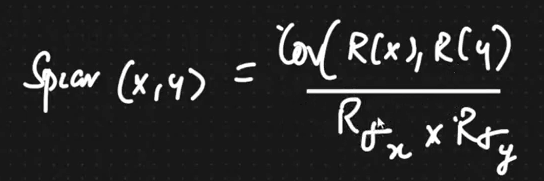
* spearmans captures the non linear properties

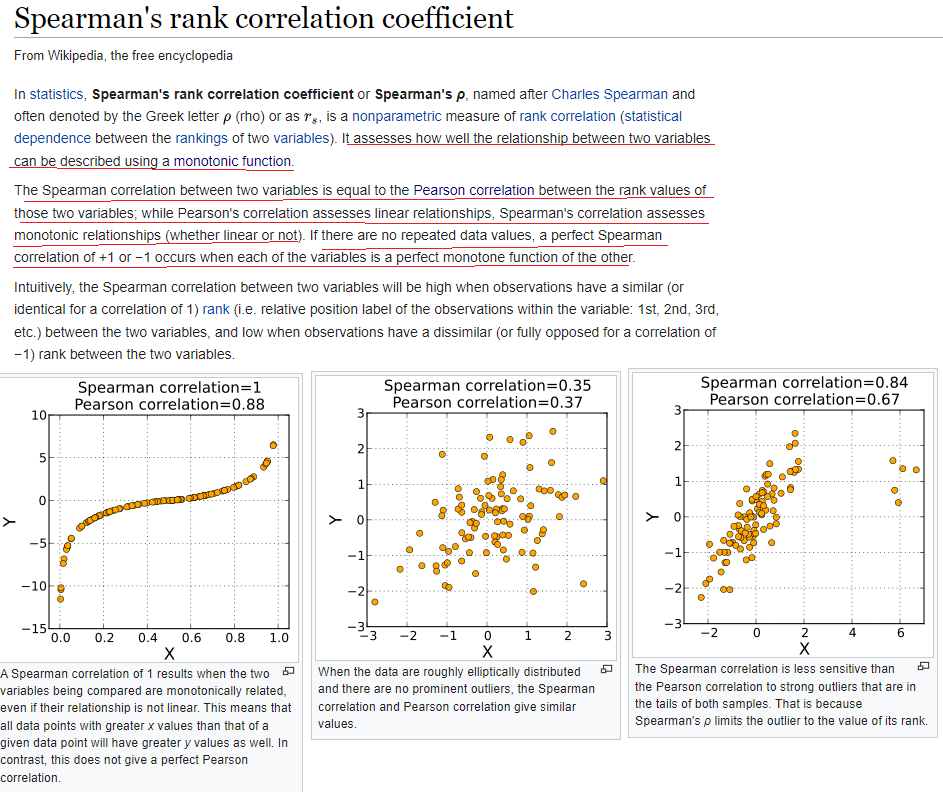

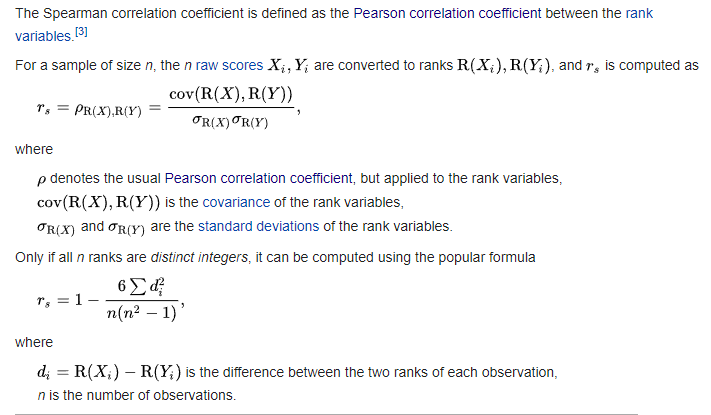

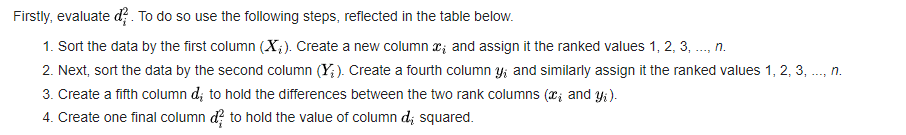

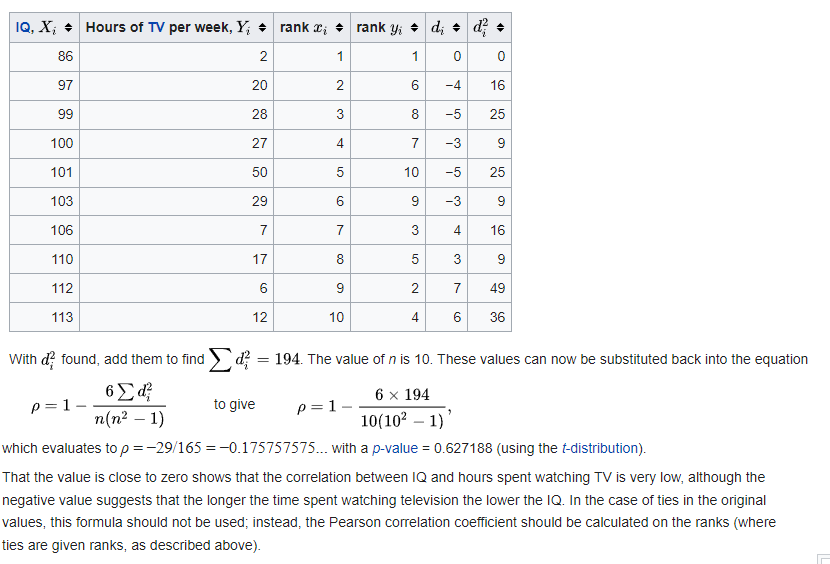